In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import ast



# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

## Here we are just importing the dataset

In [3]:
df = pd.read_csv('../input/fitnesssalesdata/sales_data_fitness.csv')
df.head()



,Channel,Country,Customertype,Date,Datemonth,Datequarter,Dateweek,Dateyear,Ordertype,Product,Product Group,Sales Channel,State,System,Qty,Revenue
0,Direct,United States,Existing,18-04-2021,2021-04,2021-2,2021-15,2021,One_Time,Endopump / Pump Enhancer,Endopump,Draft Orders,California,US,12,258
1,Unattributed,United States,Existing,01-04-2021,2021-04,2021-2,2021-12,2021,One_Time,Accessories,Accessories,Draft Orders,California,US,1,0
2,Unattributed,United States,Existing,24-04-2021,2021-04,2021-2,2021-15,2021,One_Time,Accessories,Accessories,Draft Orders,Pennsylvania,US,2,0
3,Unattributed,United States,Existing,24-04-2021,2021-04,2021-2,2021-15,2021,One_Time,Accessories,Accessories,Draft Orders,Texas,US,2,0
4,Unattributed,United States,Existing,24-04-2021,2021-04,2021-2,2021-15,2021,One_Time,Accessories,Accessories,Draft Orders,Washington,US,2,0


In [4]:
df1 = pd.read_csv('../input/fitnesssalesdata/sales_data_fitness.csv',parse_dates=['Date'],index_col=['Date'])
df1

,Channel,Country,Customertype,Datemonth,Datequarter,Dateweek,Dateyear,Ordertype,Product,Product Group,Sales Channel,State,System,Qty,Revenue
Date,,,,,,,,,,,,,,,
2021-04-18,Direct,United States,Existing,2021-04,2021-2,2021-15,2021,One_Time,Endopump / Pump Enhancer,Endopump,Draft Orders,California,US,12,258
2021-01-04,Unattributed,United States,Existing,2021-04,2021-2,2021-12,2021,One_Time,Accessories,Accessories,Draft Orders,California,US,1,0
2021-04-24,Unattributed,United States,Existing,2021-04,2021-2,2021-15,2021,One_Time,Accessories,Accessories,Draft Orders,Pennsylvania,US,2,0
2021-04-24,Unattributed,United States,Existing,2021-04,2021-2,2021-15,2021,One_Time,Accessories,Accessories,Draft Orders,Texas,US,2,0
2021-04-24,Unattributed,United States,Existing,2021-04,2021-2,2021-15,2021,One_Time,Accessories,Accessories,Draft Orders,Washington,US,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-04,Unattributed,United States,Existing,2022-04,2022-2,2022-13,2022,Subscription,G.1.M Sport / Endurance & Electrolytes,G.1.M Sport,Recharge Subscriptions,Florida,US,2,75
2022-11-04,Unattributed,United States,Existing,2022-04,2022-2,2022-14,2022,Subscription,G.1.M Sport / Endurance & Electrolytes,G.1.M Sport,Recharge Subscriptions,California,US,1,39
2022-04-14,Unattributed,United States,Existing,2022-04,2022-2,2022-14,2022,Subscription,G.1.M Sport / Endurance & Electrolytes,G.1.M Sport,Recharge Subscriptions,California,US,1,42


## Time Series Analysis - Resampling data at monthly level 

In [5]:
df2 = df1.resample('M').sum()
df2

,Dateyear,Qty,Revenue
Date,,,
2015-12-31,14105,7,213
2016-01-31,749952,445,12657
2016-02-29,806400,468,13085
2016-03-31,1032192,619,18183
2016-04-30,1139040,723,19936
...,...,...,...
2022-08-31,102343530,96297,3423204
2022-09-30,85920846,66554,2411940
2022-10-31,93470994,70021,2524096


## The below part just shows us the number of columns and every column name 
## We have a total number of 16 columns

In [6]:
df.columns


Index(['Channel', 'Country', 'Customertype', 'Date', 'Datemonth',
       'Datequarter', 'Dateweek', 'Dateyear', 'Ordertype', 'Product',
       'Product Group', 'Sales Channel', 'State', 'System', 'Qty', 'Revenue'],
      dtype='object')

In [7]:
len(df.columns)

16

## Return number of rows and columns


In [8]:
df.shape

(1442105, 16)

## Here we are just trying to describe the data - Understand the statistics of given data.

## For numeric values, describe would provide values such as mean, min, max, std. deviation.

In [9]:
df.describe() 


,Dateyear,Qty,Revenue
count,1.442105e+06,1.442105e+06,1.442105e+06
mean,2.020766e+03,1.686620e+00,5.518429e+01
std,1.247838e+00,3.479692e+00,7.964015e+01
min,2.015000e+03,1.000000e+00,-4.000000e+00
25%,2.020000e+03,1.000000e+00,3.300000e+01
50%,2.021000e+03,1.000000e+00,3.900000e+01
75%,2.022000e+03,2.000000e+00,6.000000e+01
max,2.022000e+03,1.044000e+03,1.334400e+04


## This gives us an analytical summary of the dataset

In [10]:
df.describe(include='all') 


,Channel,Country,Customertype,Date,Datemonth,Datequarter,Dateweek,Dateyear,Ordertype,Product,Product Group,Sales Channel,State,System,Qty,Revenue
count,1442105,1438746,1442105,1442105,1442105,1442105,1442105,1.442105e+06,1442105,1437212,1437212,1442105,1438235,1442105,1.442105e+06,1.442105e+06
unique,13,50,2,2506,84,29,360,NaN,2,46,44,14,175,1,NaN,NaN
top,Unattributed,United States,Existing,12-11-2021,2022-08,2022-2,2021-44,NaN,One_Time,Whey Protein Powder,Whey Protein Powder,Online Store,Texas,US,NaN,NaN
freq,375951,1404103,981456,11613,55117,144227,20806,NaN,1301106,193424,193424,1105341,119995,1442105,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.020766e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.686620e+00,5.518429e+01
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.247838e+00,NaN,NaN,NaN,NaN,NaN,NaN,3.479692e+00,7.964015e+01
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.015000e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,-4.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.020000e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,3.300000e+01
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.021000e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,3.900000e+01
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.022000e+03,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00,6.000000e+01


## Summary of distribution for relevant variables

array([[<AxesSubplot:title={'center':'Dateyear'}>,
        <AxesSubplot:title={'center':'Qty'}>],
       [<AxesSubplot:title={'center':'Revenue'}>, <AxesSubplot:>]],
      dtype=object)

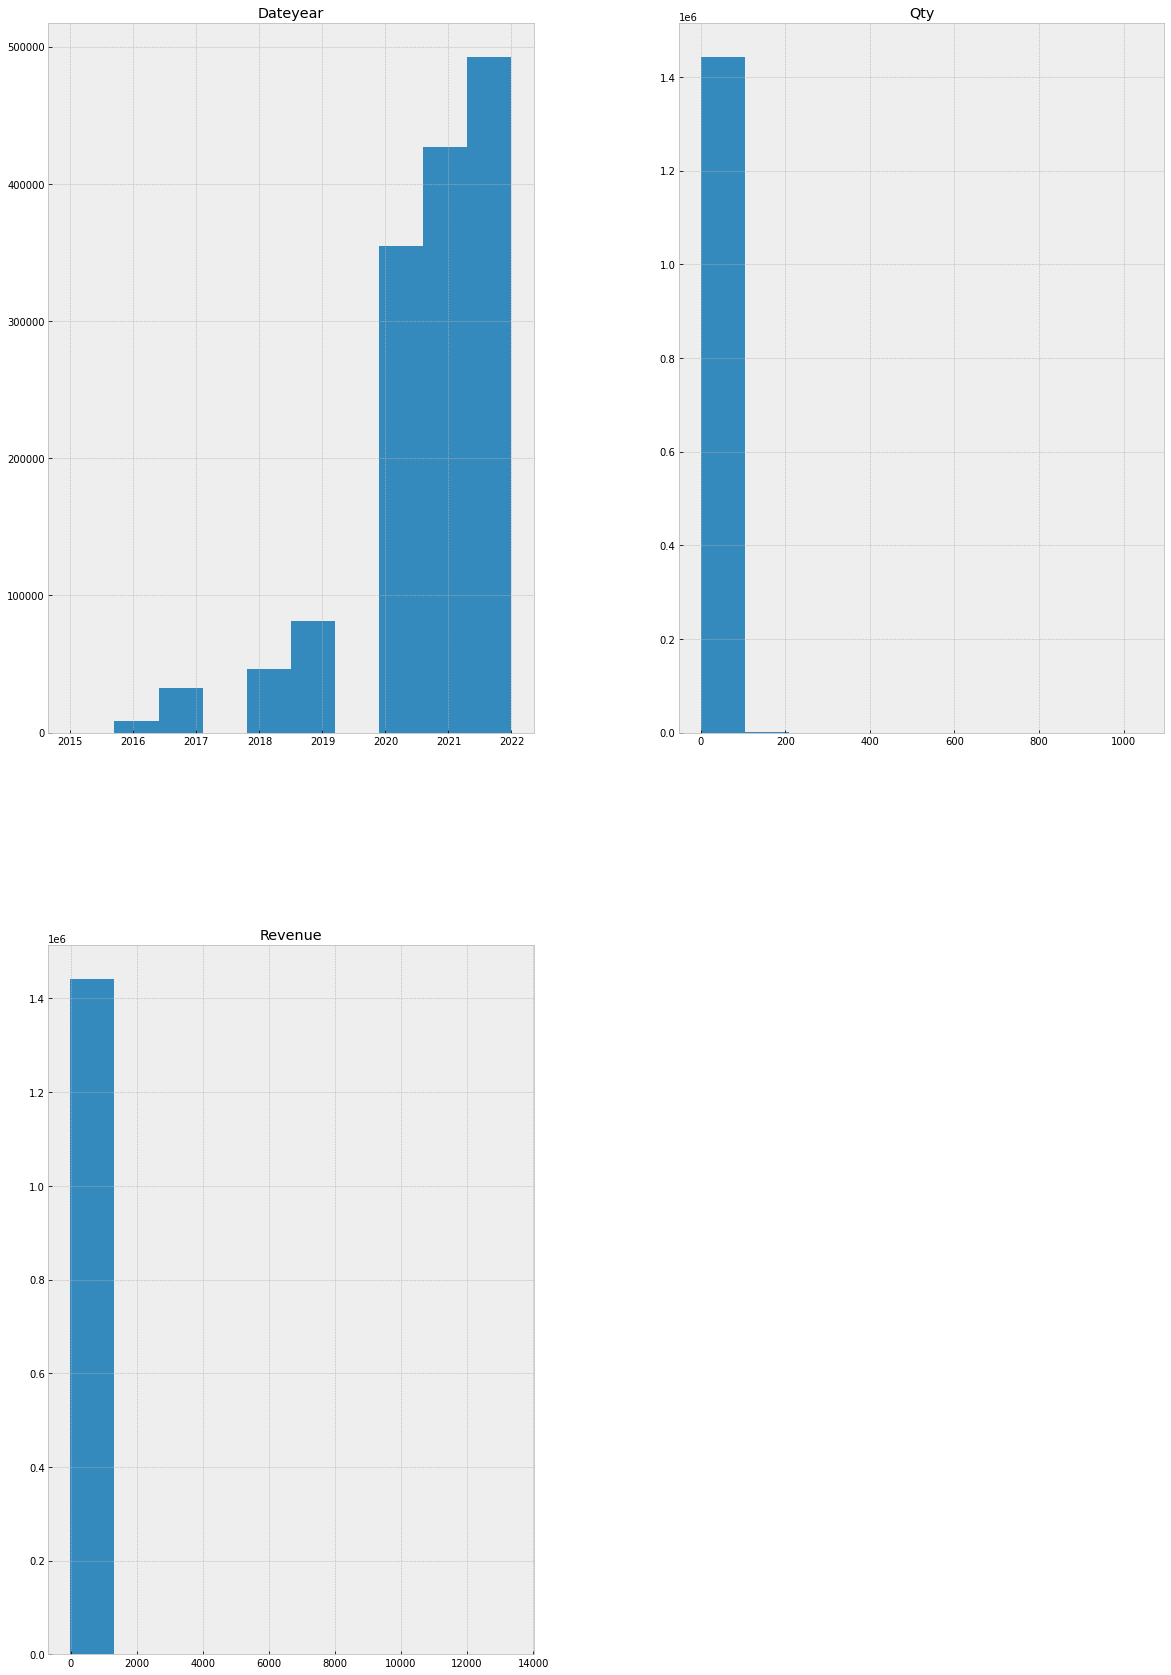

In [11]:
df.hist(figsize=(20,30)) 


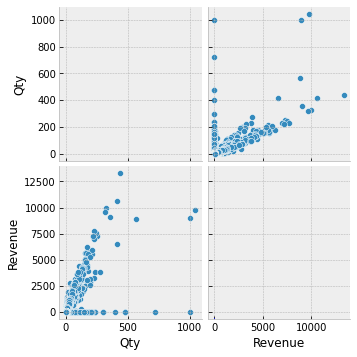

In [12]:
sns.pairplot(df[['Qty','Revenue']])


## Extract single row from dataframe

In [13]:
df.values[0]

array(['Direct', 'United States', 'Existing', '18-04-2021', '2021-04',
       '2021-2', '2021-15', 2021, 'One_Time', 'Endopump / Pump Enhancer',
       'Endopump', 'Draft Orders', 'California', 'US', 12, 258],
      dtype=object)

In [18]:
df.values[100]

array(['Unattributed', 'United States', 'Existing',
       Timestamp('2021-12-04 00:00:00'), '2021-04', '2021-2', '2021-14',
       2021, 'One_Time', 'Supplement Samples', 'Supplement Samples',
       'Draft Orders', 'North Carolina', 'US', 1, 0], dtype=object)

## Extract specific cell

In [19]:
df.values[100,1]

'United States'

In [39]:
df.values[100,5]

'2021-2'

Here we are converting the Date datatype from object to datetimeindex

In [15]:
df["Date"] = pd.to_datetime(df["Date"])


## Checking for nulls and default data types

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442105 entries, 0 to 1442104
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Channel        1442105 non-null  object        
 1   Country        1438746 non-null  object        
 2   Customertype   1442105 non-null  object        
 3   Date           1442105 non-null  datetime64[ns]
 4   Datemonth      1442105 non-null  object        
 5   Datequarter    1442105 non-null  object        
 6   Dateweek       1442105 non-null  object        
 7   Dateyear       1442105 non-null  int64         
 8   Ordertype      1442105 non-null  object        
 9   Product        1437212 non-null  object        
 10  Product Group  1437212 non-null  object        
 11  Sales Channel  1442105 non-null  object        
 12  State          1438235 non-null  object        
 13  System         1442105 non-null  object        
 14  Qty            1442105 non-null  i

## Check the number of nulls


In [78]:
df.isnull().sum()

Channel             0
Country          3359
Customertype        0
Date                0
Datemonth           0
Datequarter         0
Dateweek            0
Dateyear            0
Ordertype           0
Product          4893
Product Group    4893
Sales Channel       0
State            3870
System              0
Qty                 0
Revenue             0
dtype: int64

In [99]:
# dataframe.size
size = df.size
size

22933520

## Display number of rows/columns

In [100]:
# dataframe.shape
shape = df.shape
shape
  


(1433345, 16)

In [101]:
# printing size and shape
print("Size = {}\nShape ={}\nShape[0] x Shape[1] = {}".
format(size, shape, shape[0]*shape[1]))

Size = 22933520
Shape =(1433345, 16)
Shape[0] x Shape[1] = 22933520


## Display all the Datatypes

In [102]:
#Datatypes

df.dtypes

Channel          object
Country          object
Customertype     object
Date             object
Datemonth        object
Datequarter      object
Dateweek         object
Dateyear          int64
Ordertype        object
Product          object
Product Group    object
Sales Channel    object
State            object
System           object
Qty               int64
Revenue           int64
dtype: object

Data Elements that are Correlated 

In [103]:
df.corr()

,Dateyear,Qty,Revenue
Dateyear,1.000000,-0.007735,0.019178
Qty,-0.007735,1.000000,0.759248
Revenue,0.019178,0.759248,1.000000


<AxesSubplot:>

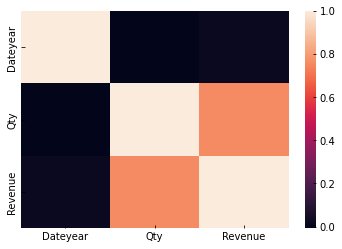

In [104]:
#Correlation plot

sns.heatmap(df.corr())

A histogram of the variable Revenue

array([[<AxesSubplot:title={'center':'Revenue'}>]], dtype=object)

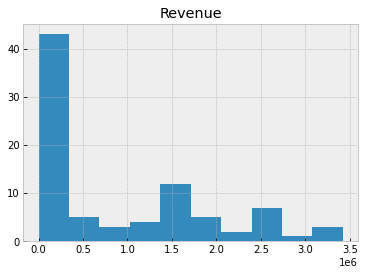

In [17]:
fig = df2.hist('Revenue')
fig

In [31]:
# Let's calculate the percentage of each Channel category.
df.Channel.value_counts(normalize=True)



Unattributed      0.260696
Direct            0.194066
Paid Search       0.184687
Organic Search    0.174335
Recharge          0.057358
Referral          0.047173
Email             0.040105
Organic Social    0.025871
Other             0.009896
Display           0.003801
Paid Social       0.001704
Video             0.000268
SMS               0.000040
Name: Channel, dtype: float64

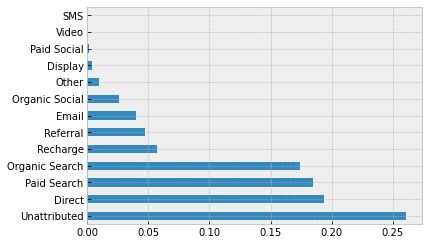

In [32]:
#plot the bar graph of percentage channel categories
df.Channel.value_counts(normalize=True).plot.barh()
plt.show()

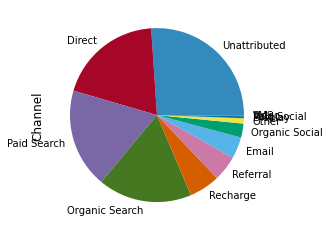

In [33]:
#plot the pie graph of percentage channel categories
df.Channel.value_counts(normalize=True).plot.pie()
plt.show()

In [36]:
# Let's calculate the percentage of each State category.
df.State.value_counts(normalize=True)

Texas               8.343212e-02
California          7.433139e-02
Florida             4.921379e-02
New York            4.099121e-02
Virginia            3.696614e-02
                        ...     
Lecco               6.952967e-07
Verona              6.952967e-07
Sutton Coldfield    6.952967e-07
Trento              6.952967e-07
Nuevo León          6.952967e-07
Name: State, Length: 175, dtype: float64

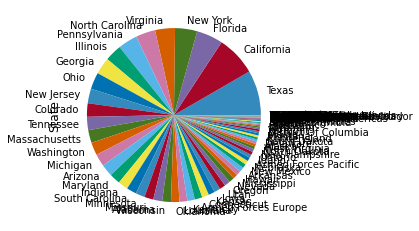

In [107]:
#calculate the percentage of each state category.
df.State.value_counts(normalize=True)

#plot the pie chart of State categories
df.State.value_counts(normalize=True).plot.pie()
plt.show()

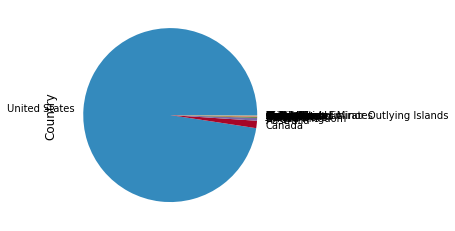

In [14]:
#calculate the percentage of each Country category.
df.Country.value_counts(normalize=True)

#plot the pie chart of education categories
df.Country.value_counts(normalize=True).plot.pie()
plt.show()

In [37]:
# Let's calculate the percentage of each Product category.
df.Product.value_counts(normalize=True)

Whey Protein Powder                          1.345828e-01
Strong Greens / Superfood Powerhouse         1.328009e-01
Flight / Pre Workout                         1.059614e-01
Strong Reds / Superfood Powerhouse           9.624746e-02
Creatine Monohydrate / Creapure®             7.579953e-02
Accessories                                  6.645227e-02
Endopump / Pump Enhancer                     5.796153e-02
Intra Flight / Branched-Chain Amino Acids    4.571838e-02
Strong Joints / Joint Support                4.267081e-02
G.1.M Sport / Endurance & Electrolytes       3.911531e-02
In Focus / Cognitive Enhancer                3.712118e-02
Strong Multi-Vitamin                         3.571150e-02
Vegan Protein Powder                         2.220619e-02
Electrolytes / Hydration Drink Mix           1.907095e-02
Field Bar / Whey Protein Nutrition Bar       1.485098e-02
Bare Burn / Fat Burner                       1.410926e-02
Supplement Samples                           1.295146e-02
Collagen Prote

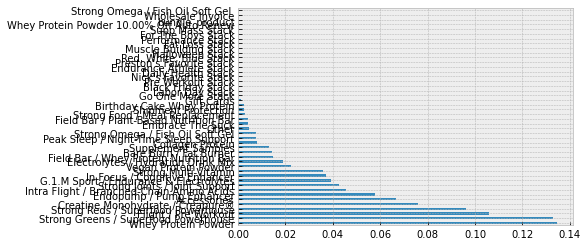

In [34]:
#plot the bar graph of percentage Product categories
df.Product.value_counts(normalize=True).plot.barh()
plt.show()

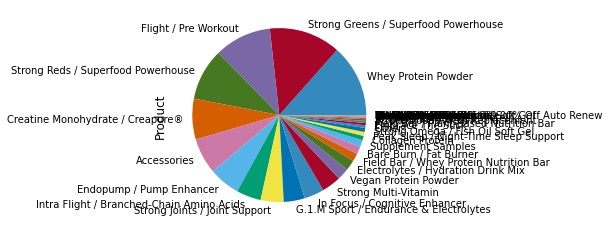

In [35]:
#plot the pie graph of percentage Product categories
df.Product.value_counts(normalize=True).plot.pie()
plt.show()

In [108]:
df.Revenue.describe()


count    1.433345e+06
mean     5.515490e+01
std      7.960150e+01
min     -4.000000e+00
25%      3.300000e+01
50%      3.900000e+01
75%      6.000000e+01
max      1.334400e+04
Name: Revenue, dtype: float64

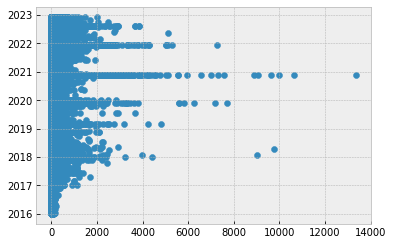

In [115]:
#plotting the scatter plot of Revenue and Dateyear variable in data
plt.scatter(df.Revenue,df.Date)
plt.show()



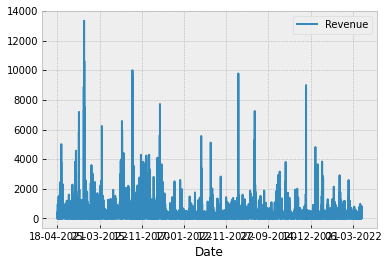

In [150]:
df.plot(x="Date", y="Revenue", kind="line")
plt.show()

Month wise plot of the Revenue

<AxesSubplot:xlabel='Date'>

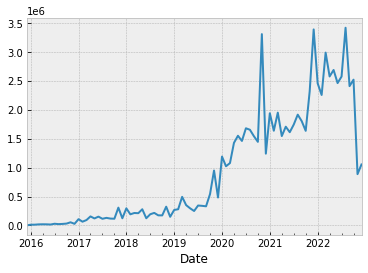

In [151]:
df2['Revenue'].plot()

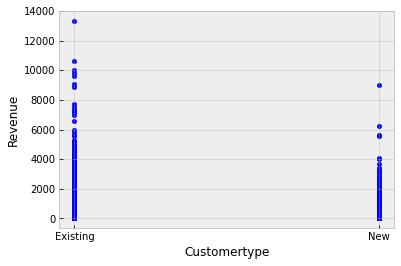

In [110]:
#plotting the scatter plot of Customertype1 and Revenue variable in data
df.plot.scatter(x="Customertype",y="Revenue")
plt.show()

In [ ]:
sns.pairplot(data = df, vars=['Revenue','Dateyear','Customertype'])
plt.show()

In [152]:
df.groupby('Channel')['Revenue'].mean()


Channel
Direct            54.209119
Display           40.702791
Email             59.263439
Organic Search    60.056545
Organic Social    45.074593
Other             51.321982
Paid Search       60.168583
Paid Social       46.518519
Recharge          62.765039
Referral          46.360567
SMS               51.258621
Unattributed      49.854143
Video             41.863049
Name: Revenue, dtype: float64

In [153]:
df.groupby('Product')['Revenue'].median()


Product
Accessories                                   30.0
Bare Burn / Fat Burner                        40.0
Birthday Cake Whey Protein                    45.0
Black Friday Stack                           121.5
Collagen Protein                              42.0
Creatine Monohydrate / Creapure®              28.0
Daily Health Stack                           107.0
Electrolytes / Hydration Drink Mix            40.0
Embrace The Suck                              40.0
Endopump / Pump Enhancer                      35.0
Endurance Athlete Stack                       85.0
Fat Loss Stack                               165.0
Field Bar / Plant-Based Nutrition Bar         30.0
Field Bar / Whey Protein Nutrition Bar        31.0
Flight / Pre Workout                          39.0
For The Boys Stack                           100.0
G.1.M Sport / Endurance & Electrolytes        40.0
Gift Cards                                    50.0
Go One More Stack                             72.0
Halloween Stack        

In [154]:
df.groupby('State')['Revenue'].mean()


State
Abu Dhabi    69.000000
Al           67.000000
Alabama      45.927902
Alaska       43.084334
Alberta      55.404287
               ...    
Wisconsin    48.600504
Wyoming      38.694784
Yukon        46.222222
Yunnan       68.657895
Zh            0.000000
Name: Revenue, Length: 175, dtype: float64

## Identify unique publishers in the dataset

In [24]:
df.Country.unique()

array(['United States', nan, 'Canada', 'Australia', 'Luxembourg',
       'United Kingdom', 'China', 'Singapore', 'Sweden', 'South Africa',
       'Hong Kong', 'Us', 'Ca', 'Gb', 'Denmark', 'Germany', 'Ireland',
       'Taiwan', 'Japan', 'Italy', 'New Zealand', 'Switzerland',
       'Netherlands', 'France', 'United Arab Emirates', 'Norway', 'Au',
       'Egypt', 'Afghanistan', 'India', 'Cn', 'Poland', 'Portugal',
       'Belgium', 'Romania', 'Bermuda', 'Finland', 'Austria',
       'South Korea', 'Iraq', 'Israel', 'Jordan',
       'United States Minor Outlying Islands', 'Slovenia', 'Greece',
       'Zimbabwe', 'Czech Republic', 'Null', 'Hungary', 'Mexico',
       'Turkey'], dtype=object)

In [25]:
df.Country.unique().size

51

In [26]:
df.Country.value_counts()

United States                           1404103
Canada                                    19674
Australia                                  7545
United Kingdom                             2050
Singapore                                  1705
New Zealand                                 899
Ireland                                     450
Us                                          425
Hong Kong                                   363
Switzerland                                 280
Netherlands                                 269
Sweden                                      207
France                                      176
South Africa                                128
Taiwan                                       90
China                                        48
Norway                                       45
Denmark                                      39
Luxembourg                                   29
Germany                                      28
United Arab Emirates                    

## Show top 10

In [27]:
df.Country.value_counts().head(10)

United States     1404103
Canada              19674
Australia            7545
United Kingdom       2050
Singapore            1705
New Zealand           899
Ireland               450
Us                    425
Hong Kong             363
Switzerland           280
Name: Country, dtype: int64

In [29]:
df.Country.value_counts(ascending = True) 

Turkey                                        1
Bermuda                                       1
Cn                                            1
Greece                                        1
Zimbabwe                                      1
Mexico                                        1
Hungary                                       1
Slovenia                                      2
United States Minor Outlying Islands          2
Iraq                                          2
Null                                          2
Ca                                            3
Jordan                                        3
Austria                                       3
India                                         4
Israel                                        4
Czech Republic                                4
Afghanistan                                   5
Romania                                       5
Poland                                        6
Finland                                 

In [28]:
df.State.value_counts().head(10)

Texas             119995
California        106906
Florida            70781
New York           58955
Virginia           53166
North Carolina     52445
Pennsylvania       51871
Illinois           45244
Georgia            44910
Ohio               44583
Name: State, dtype: int64

In [30]:
feature_names=list(df.columns)
pd.DataFrame([[f, df[f].dtype, df[f].nunique()] for f in feature_names], 
              columns=['feature', 'type', 'distinct values'])

,feature,type,distinct values
0,Channel,object,13
1,Country,object,50
2,Customertype,object,2
3,Date,datetime64[ns],2506
4,Datemonth,object,84
5,Datequarter,object,29
6,Dateweek,object,360
7,Dateyear,int64,8
8,Ordertype,object,2
9,Product,object,46


As you can see we have taken the time series data and in this type of data **we don't have any data imbalance**
Time Series Data - A time series is a sequence of data points that occur in successive order over some period of time. This can be contrasted with cross-sectional data, which captures a point in time.

### To be Continued..........